# MTA Traffic Forecasting
Khyatee Desai & Justin Morgan
# Part 4: Modeling Process
This notebook includes feature engineering and modeling

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

### Import Cleaned Data

In [2]:
df = pd.read_pickle("./pickled/cleaned_data")
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-25,6000.0,12145.000000,12986.000000,1158.000000,5164.000000,8085.000000,15009.000000,1699.0,1081.0,34775.000000,...,910.0,2232.000000,2600.000000,9569.0,3063.000000,3983.0,2014.0,3998.000000,1013.000000,1.877042e+06
2020-01-26,4970.0,12145.000000,10707.000000,980.000000,4342.000000,6510.000000,15009.000000,1699.0,969.0,34775.000000,...,799.0,2003.000000,2139.000000,8478.0,2798.000000,3983.0,2014.0,3984.285714,848.000000,1.789382e+06
2020-01-27,5211.5,12312.285714,11175.166667,1169.666667,4356.857143,6533.479167,14979.428571,1699.0,1010.5,34550.428571,...,819.5,2000.428571,2271.333333,9072.5,2922.833333,3983.0,2014.0,3970.571429,889.833333,1.814949e+06
2020-01-28,5453.0,12479.571429,11643.333333,1359.333333,4371.714286,6556.958333,14949.857143,1699.0,1052.0,34325.857143,...,840.0,1997.857143,2403.666667,9667.0,3047.666667,3983.0,2014.0,3956.857143,931.666667,1.840517e+06
2020-01-29,5694.5,12646.857143,12111.500000,1549.000000,4386.571429,6580.437500,14920.285714,1699.0,1093.5,34101.285714,...,860.5,1995.285714,2536.000000,10261.5,3172.500000,3983.0,2014.0,3943.142857,973.500000,1.866085e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,5268.0,9454.000000,9604.000000,1807.000000,3424.000000,6846.000000,10372.000000,2273.0,980.0,22645.000000,...,767.0,1426.000000,2831.000000,8939.0,2626.000000,2408.0,1791.0,2245.000000,1012.000000,1.477816e+06
2021-03-16,5603.0,9833.000000,9215.000000,1870.000000,3857.000000,7587.000000,10726.000000,2402.0,933.0,23895.000000,...,795.0,1531.000000,2912.000000,8538.0,2753.000000,2489.0,1759.0,2356.000000,862.000000,1.541218e+06
2021-03-17,5615.0,9971.000000,9383.000000,1876.000000,3944.000000,7410.000000,11243.000000,2395.0,1026.0,23802.000000,...,803.0,1565.000000,2984.000000,9219.0,2811.000000,2472.0,1808.0,2494.000000,923.000000,1.579899e+06


### Define Dickey-Fuller Test Function

In [3]:
def dickey_fuller(series):
    dftest = adfuller(series)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dftest)
    print ('\nResults of Dickey-Fuller test: \n')
    print(dfoutput)

## Inspect Stationarity

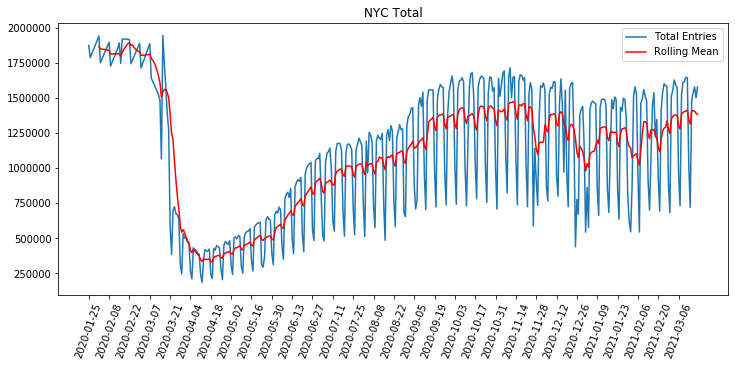

In [4]:
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()

plt.figure(figsize=(12,5));
ax = sns.lineplot(data= df["TOTAL"], label="Total Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%14==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total');

Current data contains both Trends and Seasonality
<br>
**Trend:** Varying mean over time
<br>
**Seasonality:** Certain variations at specific time-frames

### Dickey Fuller Test

In [5]:
dickey_fuller(df["TOTAL"])

(-2.2418313486893697, 0.19141475332822983, 15, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 10781.145134766986)

Results of Dickey-Fuller test: 

Test Statistic                  -2.241831
p-value                          0.191415
#Lags Used                      15.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


Dickey Fuller test confirms lack of stationarity
# Remove Trends
Compare and contrast the different methods for removing trends and seasonality in time series data including differencing, rolling means, and log transformations to reduce non-stationarity

## Log Transformation
One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.

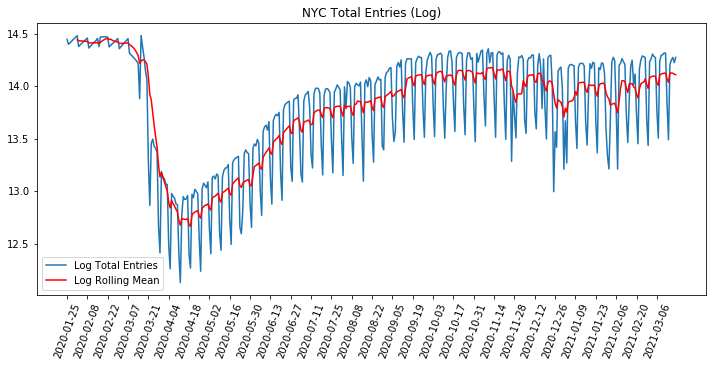

In [6]:
log_roll_mean = np.log(df["TOTAL"]).rolling(window=8, center=False).mean()
log_data = np.log(df["TOTAL"])

plt.figure(figsize=(12,5));
ax = sns.lineplot( data= log_data, label="Log Total Entries");
plt.plot(log_roll_mean, color='red', label='Log Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%14==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log)');

In [7]:
# Drop the missing values from time series calculated above
log_data.dropna(inplace=True)

### Check Stationarity with Dickey Fuller Test

In [8]:
dickey_fuller(log_data)


(-2.2511419313703676, 0.18820987993986177, 15, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, -281.2547643104681)

Results of Dickey-Fuller test: 

Test Statistic                  -2.251142
p-value                          0.188210
#Lags Used                      15.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


## Subtract Rolling Mean

In [9]:
# Subtract the moving average from the original data
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()
data_minus_roll_mean = df["TOTAL"] - roll_mean
data_minus_roll_mean.head(15)

DATE
2020-01-25             NaN
2020-01-26             NaN
2020-01-27             NaN
2020-01-28             NaN
2020-01-29             NaN
2020-01-30             NaN
2020-01-31             NaN
2020-02-01    75335.772321
2020-02-02   -99156.479167
2020-02-03   -72630.637254
2020-02-04   -46586.016805
2020-02-05   -20380.867820
2020-02-06     5944.090951
2020-02-07    32717.359509
2020-02-08    58476.646186
Name: TOTAL, dtype: float64

In [10]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

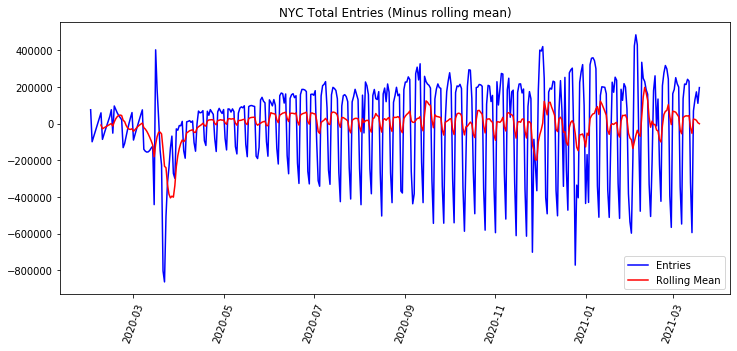

In [11]:
roll_mean = data_minus_roll_mean.rolling(window=8, center=False).mean()

plt.figure(figsize=(12,5));
plt.plot(data_minus_roll_mean, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Minus rolling mean)')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%14==0]);
plt.xticks(rotation=70);


### Check Stationarity with Dickey Fuller Test

In [12]:
dickey_fuller(data_minus_roll_mean)


(-3.9115985879606767, 0.0019511267888762396, 14, 398, {'1%': -3.4468876315017423, '5%': -2.868829424528516, '10%': -2.570653059771218}, 10505.234774074786)

Results of Dickey-Fuller test: 

Test Statistic                  -3.911599
p-value                          0.001951
#Lags Used                      14.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64


## Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). 

In [13]:
data_diff = df["TOTAL"].diff(periods=1)

In [14]:
# Drop the missing values from time series calculated above
data_diff.dropna(inplace=True)

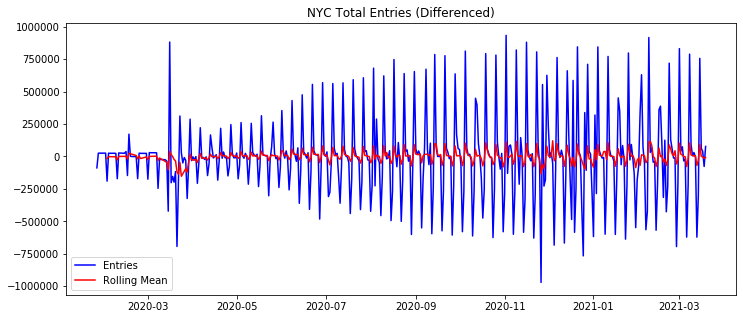

In [15]:
roll_mean = data_diff.rolling(window=8, center=False).mean()

fig = plt.figure(figsize=(12,5))
plt.plot(data_diff, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Differenced)')
plt.show(block=False)

### Confirm Stationarity with Dickey Fuller Test

In [16]:
dickey_fuller(data_diff)


(-4.630982490802583, 0.00011320956614779311, 14, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 10758.620477050756)

Results of Dickey-Fuller test: 

Test Statistic                  -4.630982
p-value                          0.000113
#Lags Used                      14.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


## Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

**Seasonal:** Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
<br>
**Trend:** The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
<br>
**Random:** Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.

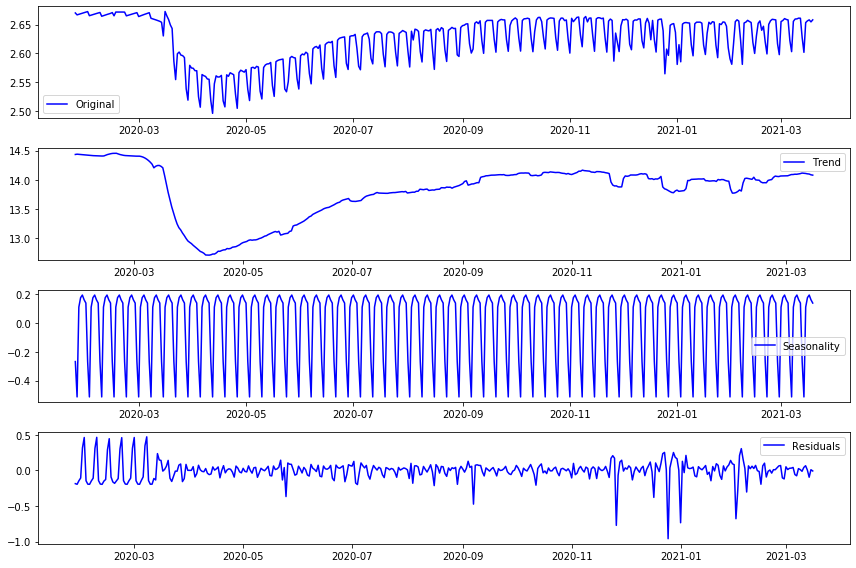

In [17]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df['TOTAL']))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(np.log(df['TOTAL'])), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Check Stationarity of Residuals with Dickey Fuller

In [18]:
# Drop missing values from residuals 
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
dickey_fuller(df_log_decompose)


(-10.428741354629473, 1.631615273984456e-18, 12, 401, {'1%': -3.4467631030732506, '5%': -2.868774682311516, '10%': -2.570623877774392}, -702.6422043222749)

Results of Dickey-Fuller test: 

Test Statistic                -1.042874e+01
p-value                        1.631615e-18
#Lags Used                     1.200000e+01
Number of Observations Used    4.010000e+02
Critical Value (1%)           -3.446763e+00
Critical Value (5%)           -2.868775e+00
Critical Value (10%)          -2.570624e+00
dtype: float64


# Autocorrelation
Autocorrelation refers to how correlated a time series is with its past values.
Processes with greater autocorrelation are more predictable than those without any form of autocorrelation. This process compares each value in the time series with it's previous value. This is called "lag 1 autocorrelation".

In [19]:
# shift the series forward by 3 lag
total = df['TOTAL']
total_shift_3 = total.shift(periods=3)
lag_3 = pd.concat([total_shift_3, total], axis=1)
lag_3.corr()

,TOTAL,TOTAL
TOTAL,1.000000,0.538818
TOTAL,0.538818,1.000000


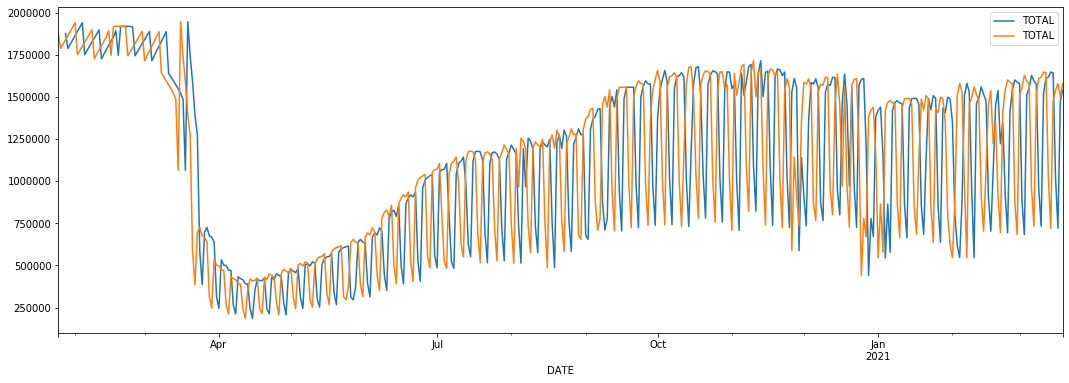

In [20]:
lag_3.plot(figsize=(18,6));

## Autocorrelation Function (ACF)
The autocorrelation function (ACF) is the plot used to see the correlation between the points, up to and including the lag unit.
- It's a function that represents autocorrelation of a time series as a function of the time lag.
- lets you know how the given time series is correlated with itself.
- The dotted lines in the plot tell you about the statistical significance of the correlation.

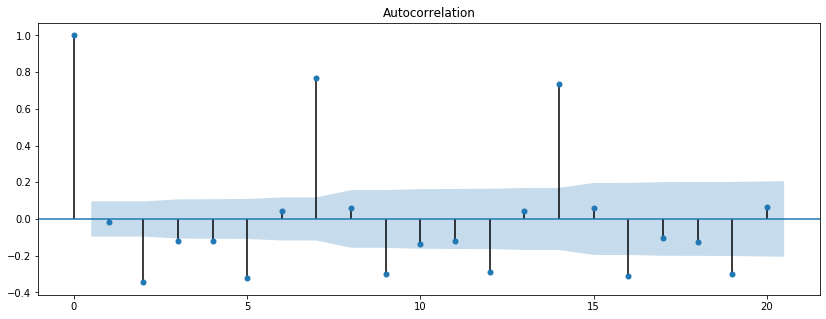

In [21]:
# Try the Statsmodels ACF just for shits
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(data_diff, lags=20);

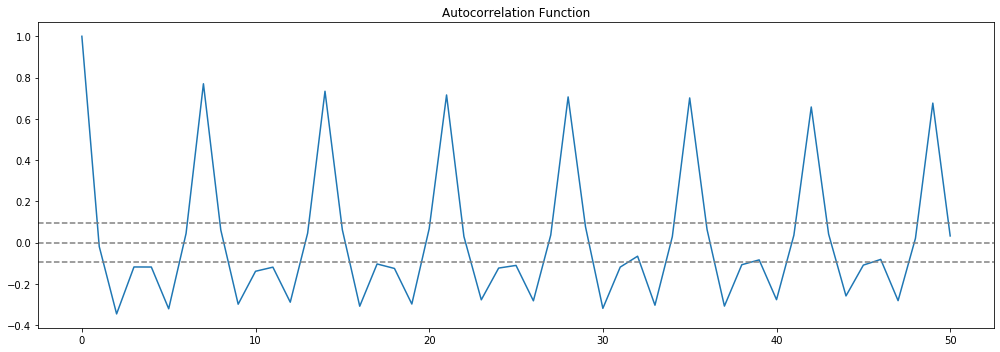

In [23]:
# different statsmodels function
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_diff, nlags=50)
plt.plot(lag_acf);
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

The differenced ACF seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 7 seems consistently statistically significant, while it decays for longer time lags.
## Partial Autocorrelation Function (PACF)
PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points.(unlike the autocorrelation function, which does not control for other lags). 
- PACF can be interpreted as a regression of the series against its past lags. 


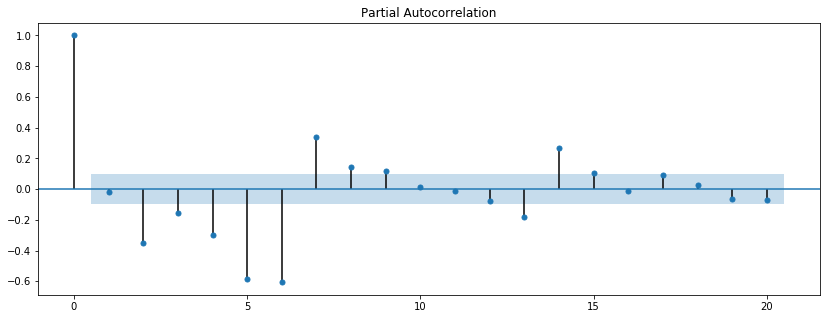

In [24]:
plot_pacf(data_diff, lags=20);

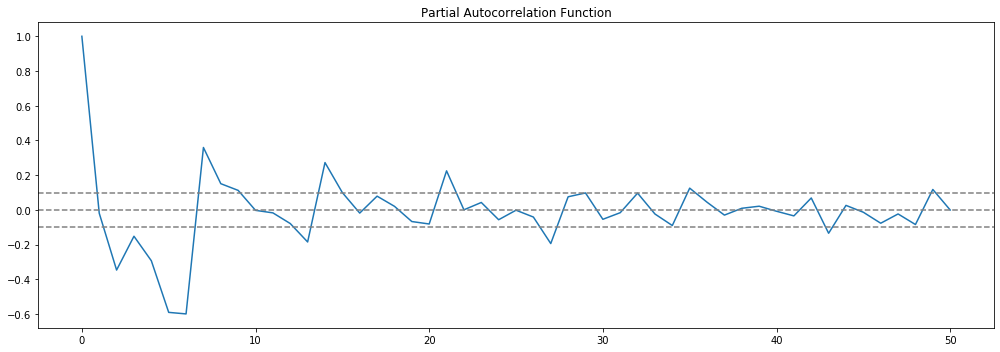

In [26]:
lag_pacf = pacf(data_diff, nlags=50, method='ols')
plt.plot(lag_pacf);
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# ARMA Model
Regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part). ARMA is generally denoted as ARMA(p, q).
- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## Autogregressive (AR) Model 
An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follows an oscillatory process

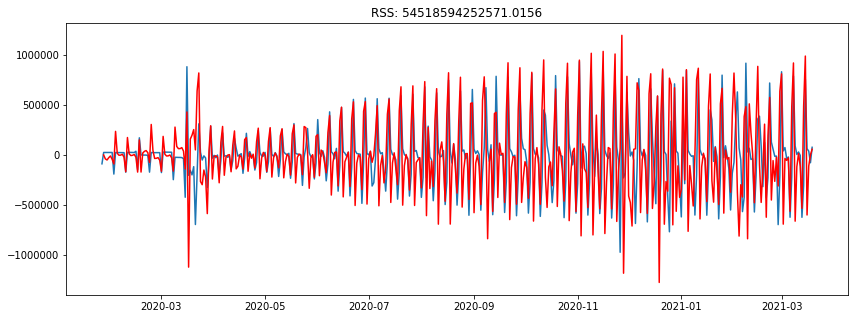

In [27]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

ar_model = ARIMA(data_diff, order=(7, 1, 0))  
results_AR = ar_model.fit(disp=-1)  
plt.plot(data_diff);
plt.plot(results_AR.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - data_diff).dropna()**2));

## Moving Average (MA) Model
The Moving Average model can be described as the weighted sum of today's and yesterday's noise.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process

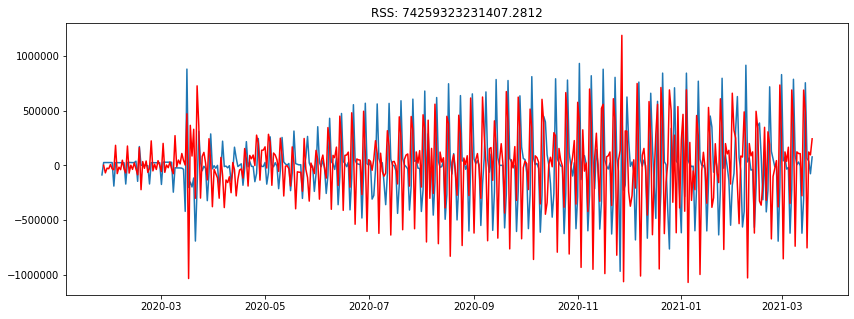

In [28]:
ma_model = ARIMA(data_diff, order=(0, 1, 6))  
results_MA = ma_model.fit(disp=-1)  
plt.plot(data_diff)
plt.plot(results_MA.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - data_diff).dropna()**2));

# Combined ARIMA Model
Combines AR and MA - *still need to figure out how to determine order (p,d,q) values and how to implement differencing before model and undifference after model*

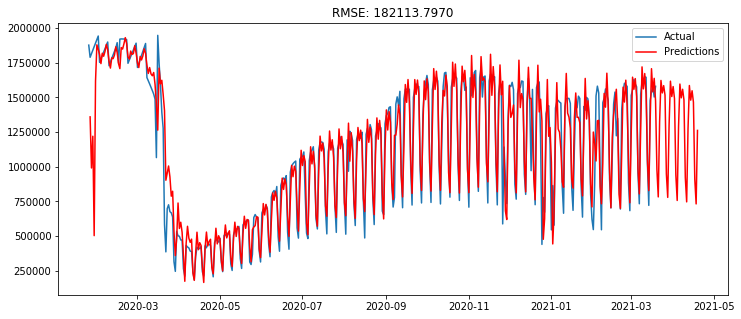

In [29]:
plt.figure(figsize=(12,5));
arima_model = ARIMA(df['TOTAL'], order=(6,0,6))  
arima_fit = arima_model.fit(disp=-1)  
preds = arima_fit.predict(start=1, end=450)

plt.plot(df['TOTAL'], label="Actual")
plt.plot(preds, color='red', label="Predictions");
plt.title('RMSE: %.4f'% np.sqrt(sum((preds - df['TOTAL']).dropna()**2)/len(df['TOTAL'])));
plt.legend(loc='best');

### Return to Original Scale
commented out for now because didnt use differencing for model

In [665]:
# def rebuild_diffed(diffed, original):
#     cumsum = diffed.cumsum()
#     return cumsum.fillna(0) + original

In [666]:
# predictions_ARIMA_diff = pd.Series(arima_fit.fittedvalues, copy=True)
# preds = rebuild_diffed(predictions_ARIMA_diff, df['TOTAL'])


In [667]:
# predictions_ARIMA_diff = pd.Series(arima_fit.fittedvalues, copy=True)
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# predictions_ARIMA_log = pd.Series(df['TOTAL'].iloc[0], index= df['TOTAL'].index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

# plt.plot(df['TOTAL'], label="Actual");
# plt.plot(predictions_ARIMA_log, label='Predictions');
# plt.legend(loc='best');

## Use Model to Forecast

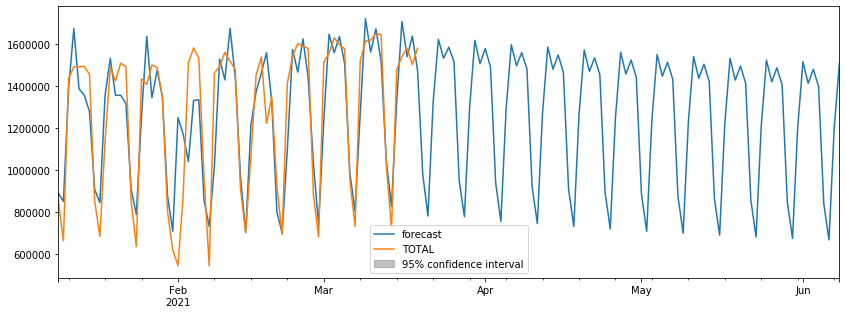

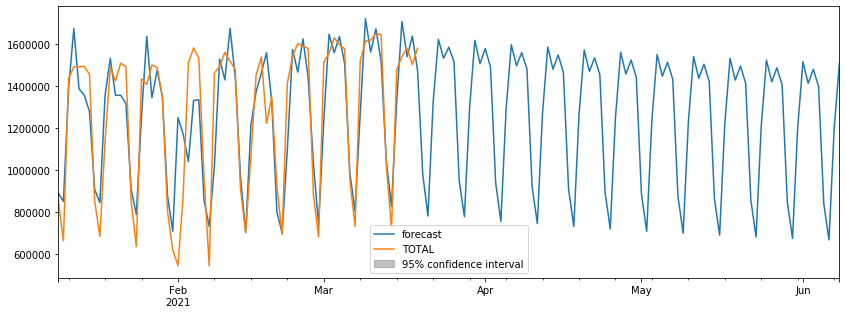

In [30]:
arima_fit.plot_predict(350,500)

### Wrap Model in a Function
Function is used to forecast on every station

In [31]:
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-25,6000.0,12145.000000,12986.000000,1158.000000,5164.000000,8085.000000,15009.000000,1699.0,1081.0,34775.000000,...,910.0,2232.000000,2600.000000,9569.0,3063.000000,3983.0,2014.0,3998.000000,1013.000000,1.877042e+06
2020-01-26,4970.0,12145.000000,10707.000000,980.000000,4342.000000,6510.000000,15009.000000,1699.0,969.0,34775.000000,...,799.0,2003.000000,2139.000000,8478.0,2798.000000,3983.0,2014.0,3984.285714,848.000000,1.789382e+06
2020-01-27,5211.5,12312.285714,11175.166667,1169.666667,4356.857143,6533.479167,14979.428571,1699.0,1010.5,34550.428571,...,819.5,2000.428571,2271.333333,9072.5,2922.833333,3983.0,2014.0,3970.571429,889.833333,1.814949e+06
2020-01-28,5453.0,12479.571429,11643.333333,1359.333333,4371.714286,6556.958333,14949.857143,1699.0,1052.0,34325.857143,...,840.0,1997.857143,2403.666667,9667.0,3047.666667,3983.0,2014.0,3956.857143,931.666667,1.840517e+06
2020-01-29,5694.5,12646.857143,12111.500000,1549.000000,4386.571429,6580.437500,14920.285714,1699.0,1093.5,34101.285714,...,860.5,1995.285714,2536.000000,10261.5,3172.500000,3983.0,2014.0,3943.142857,973.500000,1.866085e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,5268.0,9454.000000,9604.000000,1807.000000,3424.000000,6846.000000,10372.000000,2273.0,980.0,22645.000000,...,767.0,1426.000000,2831.000000,8939.0,2626.000000,2408.0,1791.0,2245.000000,1012.000000,1.477816e+06
2021-03-16,5603.0,9833.000000,9215.000000,1870.000000,3857.000000,7587.000000,10726.000000,2402.0,933.0,23895.000000,...,795.0,1531.000000,2912.000000,8538.0,2753.000000,2489.0,1759.0,2356.000000,862.000000,1.541218e+06
2021-03-17,5615.0,9971.000000,9383.000000,1876.000000,3944.000000,7410.000000,11243.000000,2395.0,1026.0,23802.000000,...,803.0,1565.000000,2984.000000,9219.0,2811.000000,2472.0,1808.0,2494.000000,923.000000,1.579899e+06


In [40]:
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(series, arima_order):
    arima_model = ARIMA(series, order=arima_order)  
    arima_fit = arima_model.fit(disp=-1)  
    rmse = np.sqrt(sum((arima_fit.fittedvalues - series).dropna()**2)/len(series))
    return rmse

In [65]:
def evaluate_models(series, p_values, d_values, q_values):
    series = series.astype('float32')
    best_score, best_order = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    order = (p, d, q)
                    rmse = evaluate_arima_model(series, order)
                    if rmse < best_score:
                        best_score, best_order = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA: %s  RMSE=%.3f' % (best_order, best_score))
    return best_order
    

In [64]:
pred_df = pd.DataFrame()
for station in df.columns[:10]:
    best_order = evaluate_models(df[station],range(4, 8),range(0, 1),range(4, 8))
    try:
        arima_model = ARIMA(df[station], order=(best_order)) 
        arima_fit = arima_model.fit()  
        preds = arima_fit.predict(start=df.shape[0],end=df.shape[0]+60)
        pred_df[station] = preds
    except:
        print('\nFAILED:',station)
pred_df
warnings.filterwarnings("ignore")

Best ARIMA: (6, 0, 7)  RMSE=617.520

Best ARIMA: (6, 0, 4)  RMSE=959.621

Best ARIMA: (6, 0, 7)  RMSE=1074.982

Best ARIMA: (6, 0, 7)  RMSE=225.365

Best ARIMA: (6, 0, 7)  RMSE=462.867

Best ARIMA: (6, 0, 7)  RMSE=764.684

Best ARIMA: (6, 0, 7)  RMSE=1296.280

Best ARIMA: (6, 0, 6)  RMSE=280.300

Best ARIMA: (6, 0, 4)  RMSE=107.033

Best ARIMA: (6, 0, 6)  RMSE=3043.558



,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST
2021-03-20,4296.785355,5976.749037,7241.389585,1044.915861,2495.095795,5337.554210,7804.975271,1468.177487,603.770759,16493.267331
2021-03-21,3339.505325,5317.587494,5939.502612,826.303979,1780.821886,4112.633973,6291.365729,1084.777722,542.001867,12887.418791
2021-03-22,4802.626553,8708.173735,8639.546194,1610.270973,3084.810548,6284.490673,9429.661472,2026.357219,825.691034,19850.747159
2021-03-23,5761.996304,10537.737815,9756.286388,1925.191664,3924.247657,7628.812049,11247.164112,2519.844953,993.600185,24693.537772
2021-03-24,5470.827307,9660.343755,9253.375137,1761.802738,3821.093589,7303.327226,10771.799206,2242.846266,917.761884,23425.153297
...,...,...,...,...,...,...,...,...,...,...
2021-05-15,3858.106573,6198.206496,6834.337933,814.172405,2149.899676,4796.579454,7477.124909,1014.437054,580.967332,15480.969402
2021-05-16,3057.640801,5195.777685,5966.790150,652.947410,1520.413284,3693.068128,6290.429771,628.611816,488.365180,11708.625690
2021-05-17,4433.177364,8670.465510,8153.694632,1404.570930,2710.584154,5683.314815,8798.970518,1556.137425,755.788431,18473.924564
2021-05-18,5310.348593,10477.570418,9091.185812,1761.618904,3643.438885,7038.894682,10554.786081,2077.496138,877.753860,23549.208651
